In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Reading File

In [17]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As you can see in the previous output the columns Alley,PoolQC,Fence,MiscFeature contains a lot of null values, so we will drop those columns                   

In [19]:
df_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)
df_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)

In [20]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [21]:
#Here we will d

In [66]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [65]:
df_train[df_train['SalePrice'] >= 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Correlation Matrix

The propouse here with this matriz is to identify those features with high correlation (more than 0.5 or less than -0.5)and then drop them

Text(0.5, 1.0, 'Correlation between Variables in happiness21')

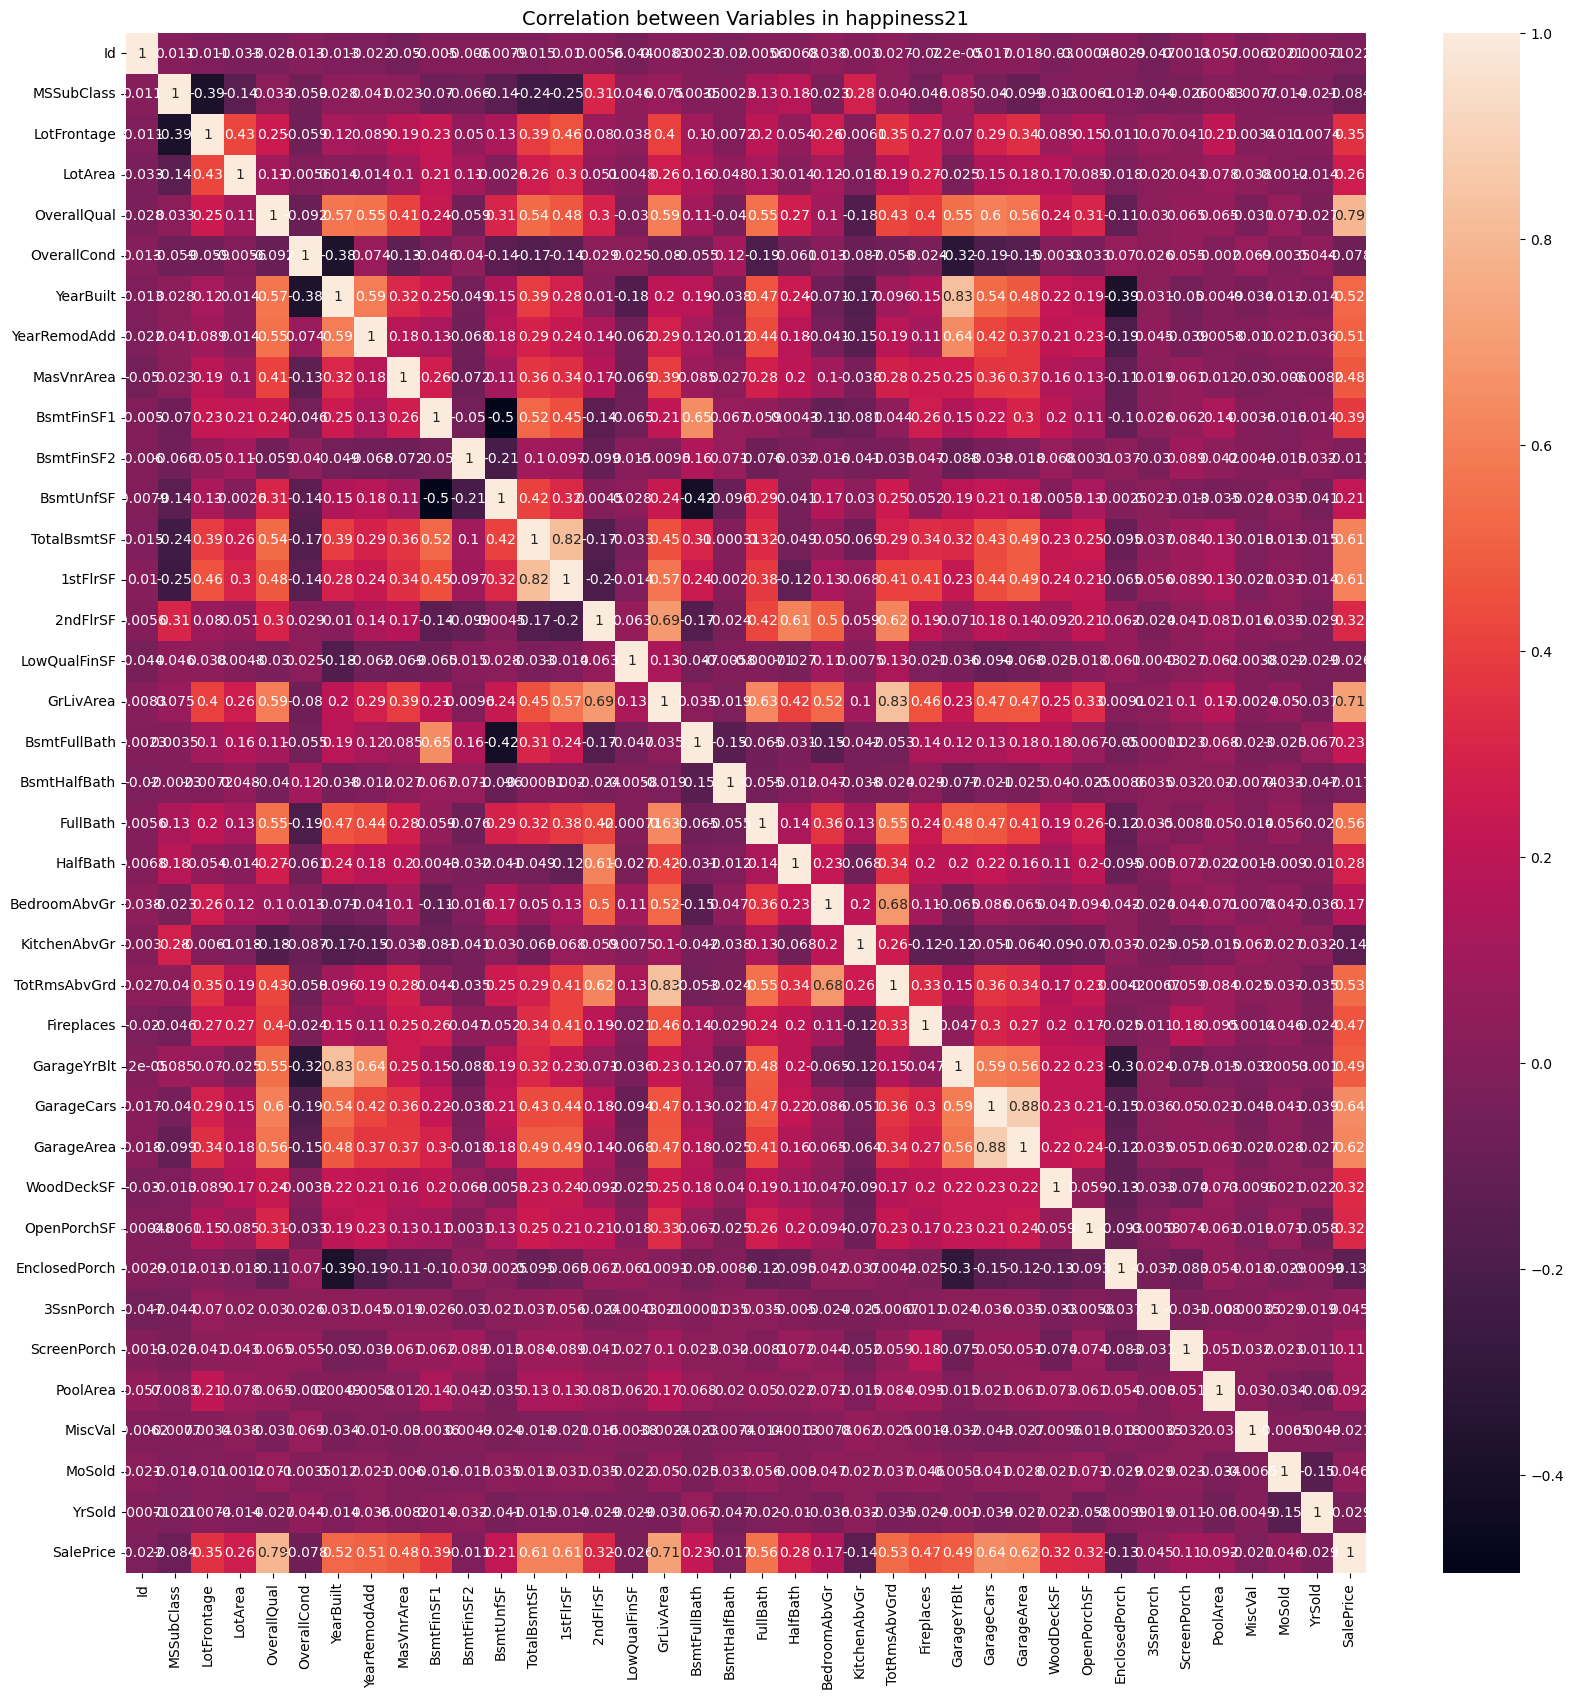

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# create heatmap for the calculated correlation
plt.figure(figsize=(20,20))
correlation = df_train[np.array(df_train.columns)].corr()
sns.heatmap(correlation,annot=True, fmt='.2g')
plt.title('Correlation between Variables in happiness21', fontsize=14)

from the heat we choose the following columns to drop:

OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,
Fireplaces, GarageYrBlt, GarageCars, GarageArea

In [24]:
df_train.drop(columns=['OverallQual',
                       'YearBuilt',
                       'YearRemodAdd',
                       'TotalBsmtSF',
                       '1stFlrSF',
                       'GrLivArea',
                       'FullBath',
                       'TotRmsAbvGrd', 
                       'Fireplaces', 
                       'GarageYrBlt', 
                       'GarageCars', 
                       'GarageArea'],
              inplace=True)

Text(0.5, 1.0, 'Correlation between Variables in happiness21')

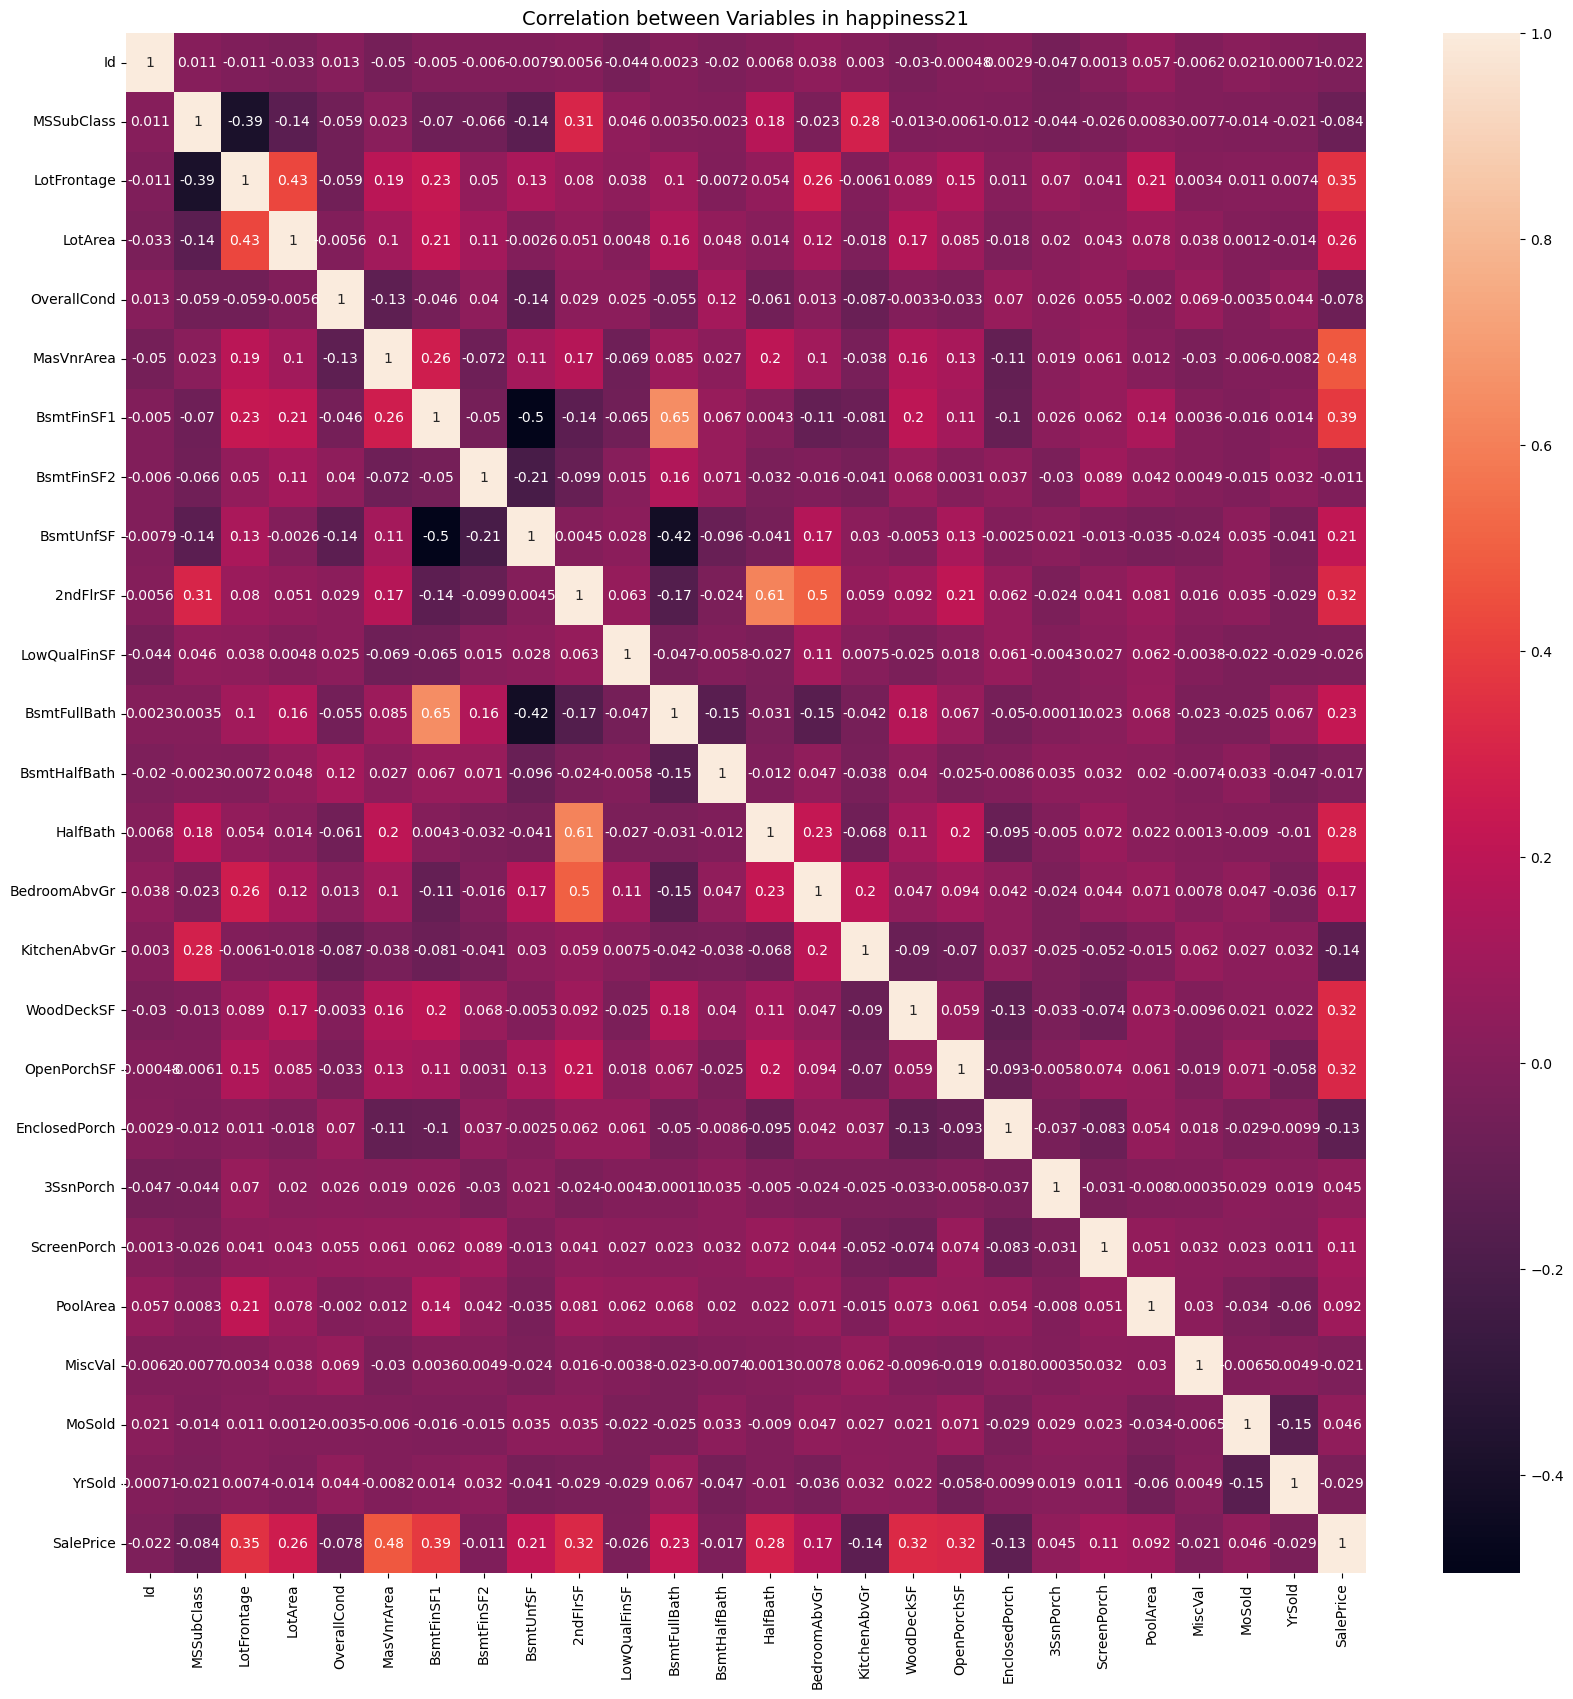

In [25]:
plt.figure(figsize=(20,20))
correlation = df_train[np.array(df_train.columns)].corr()
sns.heatmap(correlation,annot=True, fmt='.2g')
plt.title('Correlation between Variables in happiness21', fontsize=14)

In [26]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='ob

In [27]:
df_train.select_dtypes(include='number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# SelectKBest

The propouse here is to select the best categorical data for our model. For this we use selectKbest that works for regression and classification|

In [28]:
features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
for col in features:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [55]:
y = df_train['SalePrice']
#X[features] = df_train[features].apply(lambda x: x.cat.codes)


In [38]:
X = df_train[features]

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2
select = SelectKBest(score_func=f_regression, k=20) # Here the parameter score_func is uset to specificy if we want this for regression or classification
z = select.fit_transform(X[features], y) 


KeyError: "None of [Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',\n       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',\n       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',\n       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',\n       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\n       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',\n       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',\n       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [ ]:
from numpy import array 
filter = select.get_support()
features = array(features)
 
print("All features:")
print(features)
 
print("Selected best 5:")
print(list(features[filter]))



In [ ]:
(
    pd.DataFrame({
    'variable': X.columns,
    'chi2_stat': select.scores_,
    'p_value': select.pvalues_})
    .sort_values(by='p_value', ascending=True)
)

# Training Models

The models that will be considere are:

- LogisticRegression
- AdaBoostRegressor
- Regression With L1 regularization

In [40]:
numeric_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold',]
selected_categorical_features = ['MSZoning', 'LotShape', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']

In [41]:
X = df_train[selected_categorical_features]
X[numeric_features] = df_train[numeric_features]
X = pd.get_dummies(X, columns = selected_categorical_features)



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
for i in X.columns:
    print(i)

MSSubClass
LotFrontage
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
HalfBath
BedroomAbvGr
KitchenAbvGr
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
HouseStyle_1.5Fin
HouseStyle_1.5Unf
HouseStyle_1Story
HouseStyle_2.5Fin
HouseStyle_2.5Unf
HouseStyle_2Story


In [43]:

clean_test = df_test[selected_categorical_features]
clean_test[numeric_features] = df_test[numeric_features]
clean_test = pd.get_dummies(clean_test, columns = selected_categorical_features)


In [44]:
X.drop(['HouseStyle_2.5Fin','Electrical_Mix','GarageQual_Ex'],axis=1,inplace= True)

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,5,196.0,706,0,150,854,0,...,1,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,8,0.0,978,0,284,0,0,...,1,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,5,162.0,486,0,434,866,0,...,1,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,5,0.0,216,0,540,756,0,...,1,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,5,350.0,655,0,490,1053,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,5,0.0,0,0,953,694,0,...,1,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,119.0,790,163,589,0,0,...,1,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,9,0.0,275,0,877,1152,0,...,1,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,6,0.0,49,1029,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [45]:
for i in clean_test.columns:
    print(i)

MSSubClass
LotFrontage
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
HalfBath
BedroomAbvGr
KitchenAbvGr
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Timber
Neighborhood_Veenker
HouseStyle_1.5Fin
HouseStyle_1.5Unf
HouseStyle_1Story
HouseStyle_2.5Unf
HouseStyle_2Story
HouseStyle_SFoyer


In [46]:
clean_test

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,6,0.0,468.0,144.0,270.0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,108.0,923.0,0.0,406.0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,0.0,791.0,0.0,137.0,701,0,...,1,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,20.0,602.0,0.0,324.0,678,0,...,1,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,5,0.0,263.0,0.0,1017.0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,7,0.0,0.0,0.0,546.0,546,0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,5,0.0,252.0,0.0,294.0,546,0,...,1,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,7,0.0,1224.0,0.0,0.0,0,0,...,1,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,0.0,337.0,0.0,575.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
#clean_train.fillna(0,inplace=True)
#clean_test.fillna(0,inplace=True)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#df_training = df_training[df_training['Age'].notna()]
#df_training.info()

impute_it = IterativeImputer()
v = impute_it.fit_transform(X)
v2 = impute_it.fit_transform(clean_test)

X = pd.DataFrame(v, columns=X.columns)
clean_test = pd.DataFrame(v2, columns=clean_test.columns)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 139 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(139)
memory usage: 1.5 MB


In [ ]:
X.columns

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Linear regression

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math  

Linear = LinearRegression().fit(X, y)
predicciones = Linear.predict(X_test)
rms = mean_squared_error(np.log(y_test), np.log(predicciones), squared=False)
print(rms)
    

0.13673838631232005


# RidgeRegression

In [50]:
from sklearn.linear_model import Ridge
ridgeRegression = Ridge(alpha=0.01)
ridgeRegression.fit(X, y)
scores = cross_val_score(ridgeRegression, X, y, cv=5)
scores.mean()
predicciones = ridgeRegression.predict(X_test)
rms = mean_squared_error(y_test, predicciones, squared=False)
print(rms)


28749.778007399233


## AdaBoostRegressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(n_estimators=200)
regr.fit(X, y)
scores = cross_val_score(regr, X, y, cv=5)
scores.mean()
predicciones = regr.predict(X_test)
rms = mean_squared_error(y_test, predicciones, squared=False)
print(rms)


38349.0542279482


## RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=0)
RFR.fit(X, y)
predicciones = RFR.predict(X_test)
rms = mean_squared_error(y_test, predicciones, squared=False)

scores = cross_val_score(RFR, X, y, cv=5)

print(rms)
scores.mean()

12444.684110146269


0.8113899452107771

## GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=150,random_state=0)
reg.fit(X_train, y_train)
predicciones = reg.predict(X_test)
rms = mean_squared_error(np.log(y_test), np.log(predicciones), squared=False)
print(rms)



0.15788790652360887


# Doing Predictions

In [ ]:
predictions =  reg.predict(clean_test)
predictions

In [ ]:
data = {'Id': df_test['Id'].to_list(),
        'SalePrice': predictions }
predicciones = pd.DataFrame(data).set_index('Id')
predicciones.to_csv('/kaggle/working/out.csv')
predicciones

## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)

In [ ]:
len(df_test['Id'].to_list())

In [ ]:
len(predictions[''])